In [1]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Data handling and Visualisation Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns
import hvplot.pandas

In [3]:
# Loading Dataset
dataset = pd.read_csv('/content/Minerals_Database.csv')

In [4]:
# Visualising Dataset
dataset.head(20)

Unnamed: 0             Name  Crystal Structure  Mohs Hardness  \
0            0  Abenakiite-(Ce)                5.0           4.50   
1            1     Abernathyite                4.0           2.75   
2            2         Abhurite                5.0           2.00   
3            3   Abswurmbachite                0.0           0.00   
4            4       Actinolite                2.0           5.50   
5            5        Acuminite                2.0           3.50   
6            6          Adamite                3.0           3.50   
7            7          Adelite                0.0           0.00   
8            8        Admontite                2.0           2.50   
9            9         Aegirine                2.0           6.00   
10          10      Aenigmatite                1.0           5.50   
11          11         Aerinite                2.0           3.00   
12          12         Aerugite                5.0           4.00   
13          13        Afghanite                5.0           3.50   
14          14        Afwillite                2.0           3.50   
15          15        Agrellite                1.0           5.50   
16          16      Agrinierite                0.0           0.00   
17          17       Ahlfeldite                2.0           0.00   
18          18           Ajoite                1.0           2.00   
19          19       Akaganeite                2.0           0.00   

    Diaphaneity  Specific Gravity  Optical  Refractive Index  Dispersion  \
0           0.0             3.240      3.0             1.580         0.0   
1           3.0             3.446      3.0             1.592         0.0   
2           3.0             4.420      3.0             2.085         0.0   
3           0.0             0.000      0.0             0.000         0.0   
4           2.0             1.050      4.0             1.634         0.0   
5           3.0             3.295      4.0             1.457         0.0   
6           0.0             4.400      4.0             1.742         0.0   
7           0.0             0.000      0.0             0.000         0.0   
8           0.0             0.000      4.0             1.473         0.0   
9           1.0             3.550      4.0             1.776         0.0   
10          1.0             3.810      4.0             1.829         0.0   
11          2.0             2.480      4.0             3.383         0.0   
12          1.0             5.900      0.0             0.000         0.0   
13          3.0             2.600      3.0             1.526         0.0   
14          2.0             2.630      4.0             1.624         0.0   
15          2.0             2.880      4.0             1.576         0.0   
16          0.0             0.000      0.0             0.000         0.0   
17          0.0             0.000      0.0             0.000         0.0   
18          2.0             2.960      4.0             1.591         0.0   
19          2.0             3.520      0.0             0.000         0.0   

    Hydrogen  ...  Acetate  Phosphate  Sulphate  Carbonate  Ammonium  \
0        0.0  ...      0.0        0.0       0.0        0.0       0.0   
1        1.0  ...      0.0        0.0       0.0        0.0       0.0   
2        3.0  ...      0.0        0.0       0.0        0.0       0.0   
3        0.0  ...      0.0        0.0       0.0        0.0       0.0   
4        1.0  ...      0.0        0.0       0.0        0.0       0.0   
5        0.0  ...      0.0        0.0       0.0        0.0       0.0   
6        1.0  ...      0.0        0.0       0.0        0.0       0.0   
7        1.0  ...      0.0        0.0       0.0        0.0       0.0   
8       14.0  ...      0.0        0.0       0.0        0.0       0.0   
9        0.0  ...      0.0        0.0       0.0        0.0       0.0   
10       0.0  ...      0.0        0.0       0.0        0.0       0.0   
11       0.0  ...      0.0        0.0       0.0        0.0       0.0   
12       0.0  ...    

In [5]:
# Understanding dataset
dataset.shape

(3112, 140)

In [6]:
# Identifying any duplicate values
print(f"Number of duplicates: {dataset.duplicated().sum()}")
print(f"Percentage of duplicates: {dataset.duplicated().sum()/len(dataset)*100}%")

Number of duplicates: 0
Percentage of duplicates: 0.0%


In [7]:
# Identifying the cardinality of the dataset
dataset.nunique()

Unnamed: 0            3112
Name                  3112
Crystal Structure        7
Mohs Hardness           46
Diaphaneity              4
                      ... 
Hydrated Water          27
count                  116
Molar Mass            2937
Molar Volume          2901
Calculated Density    2509
Length: 140, dtype: int64

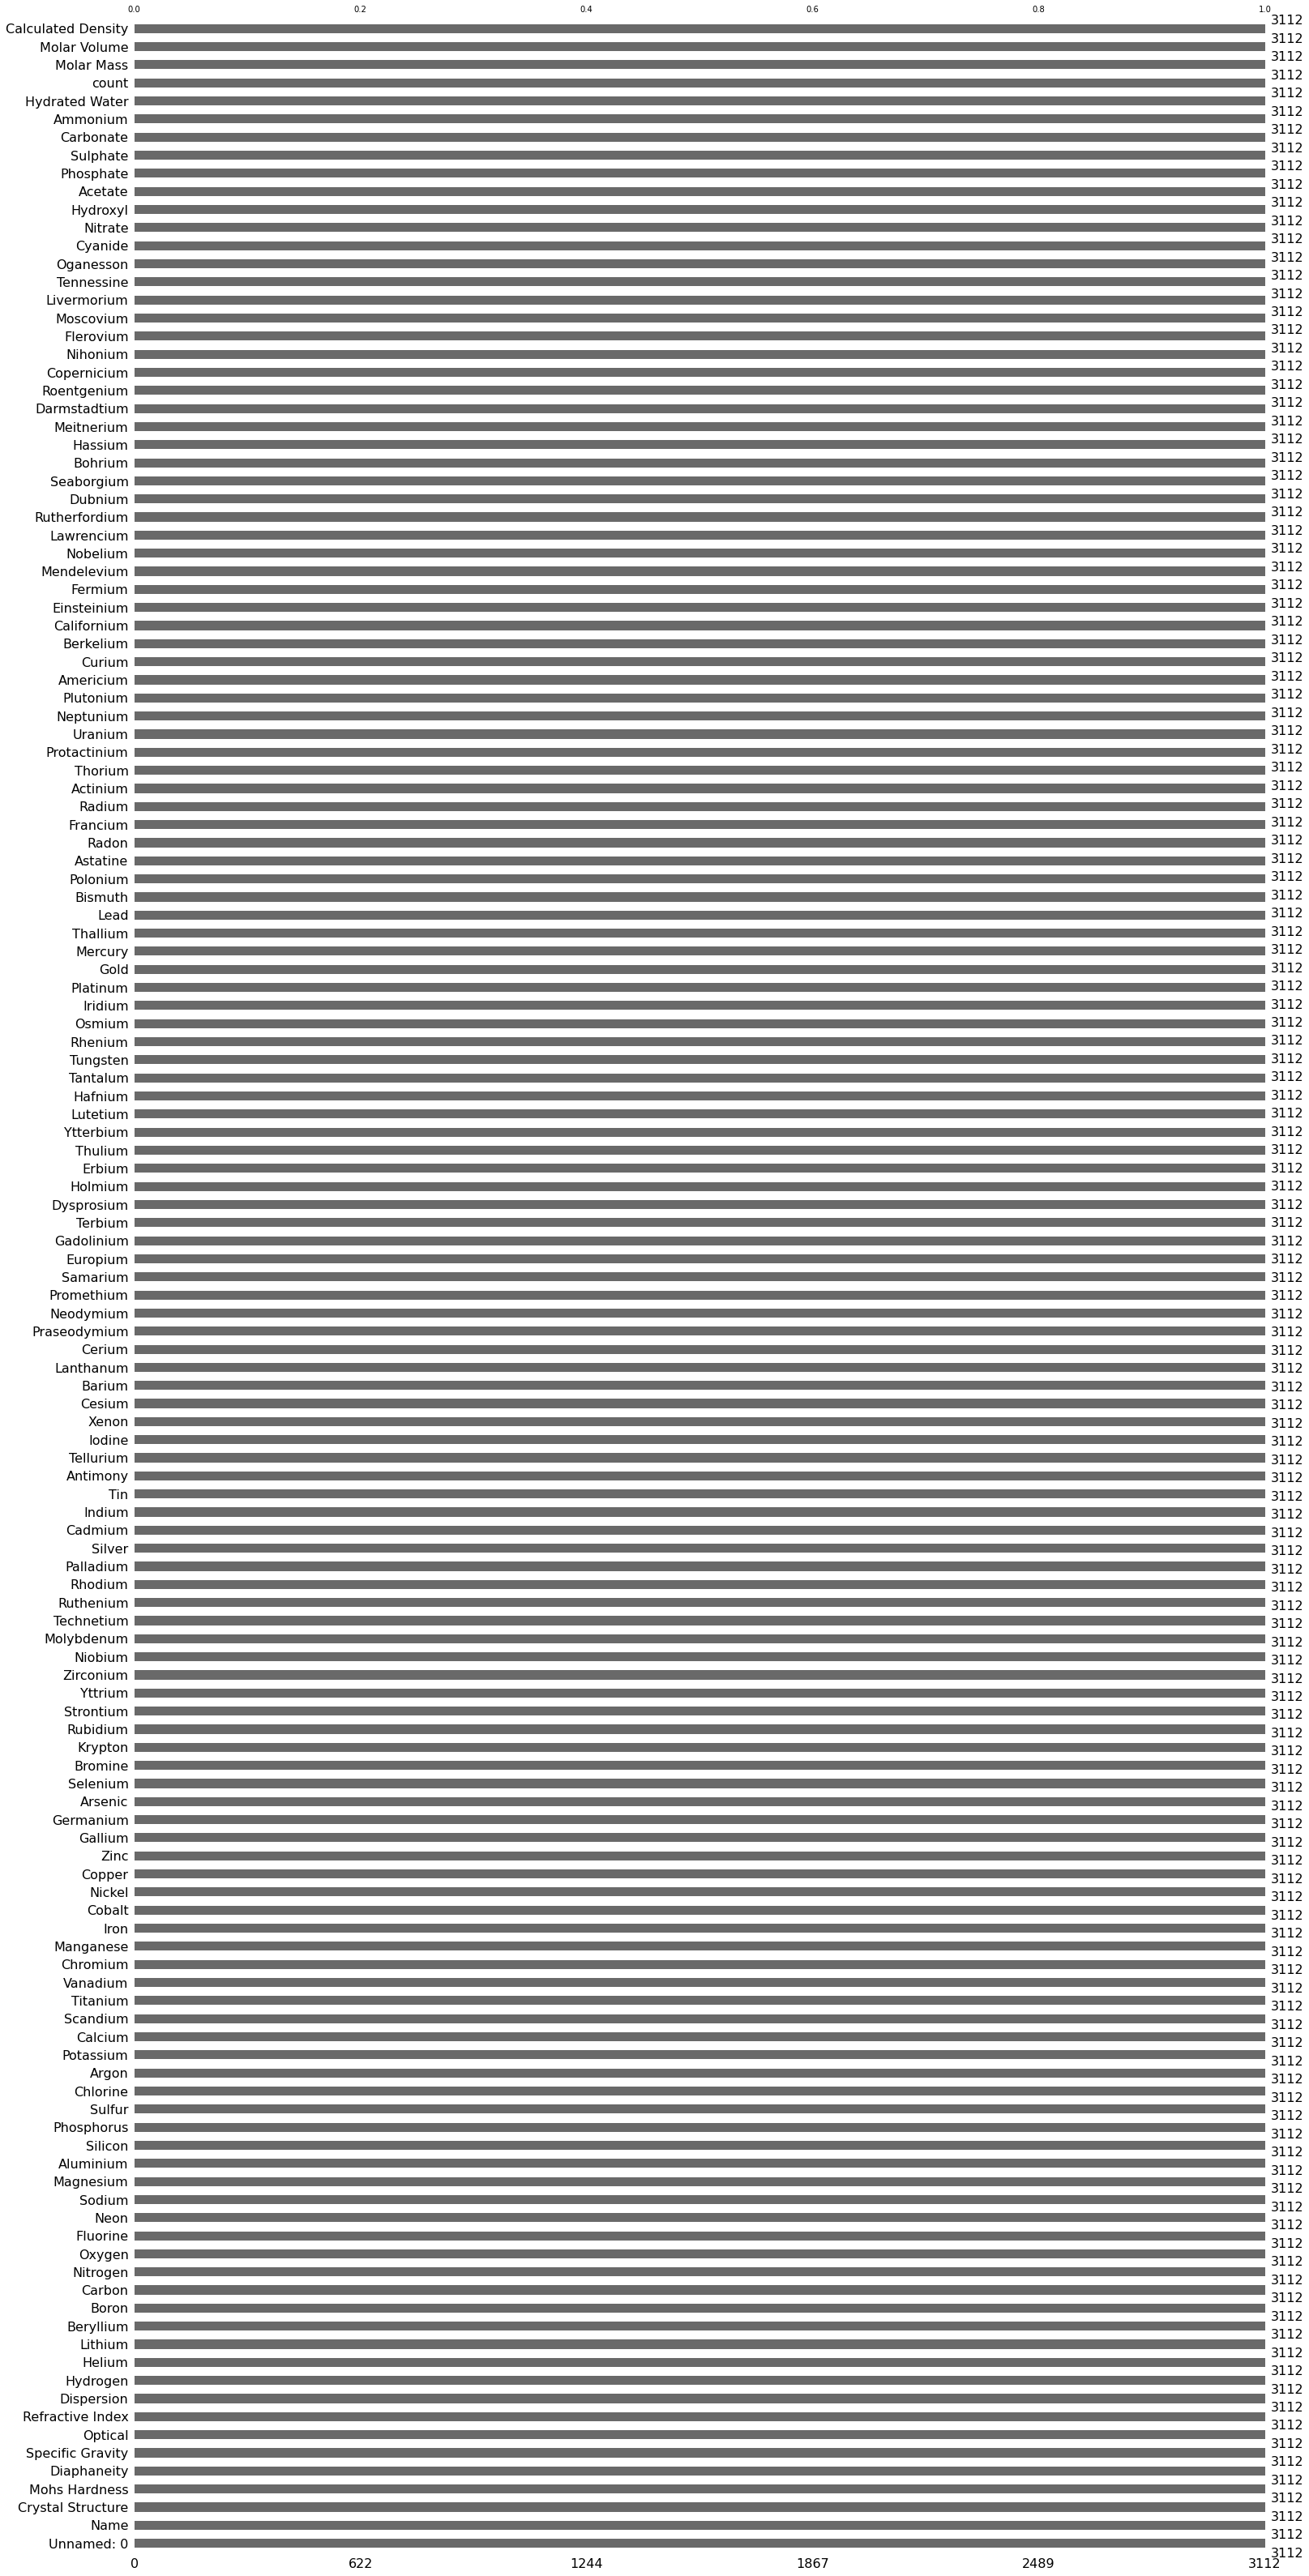

In [8]:
#Identifying missing values
import missingno as msno
msno.bar(dataset)
plt.show()

Explanatory Data Analysis (EDA)

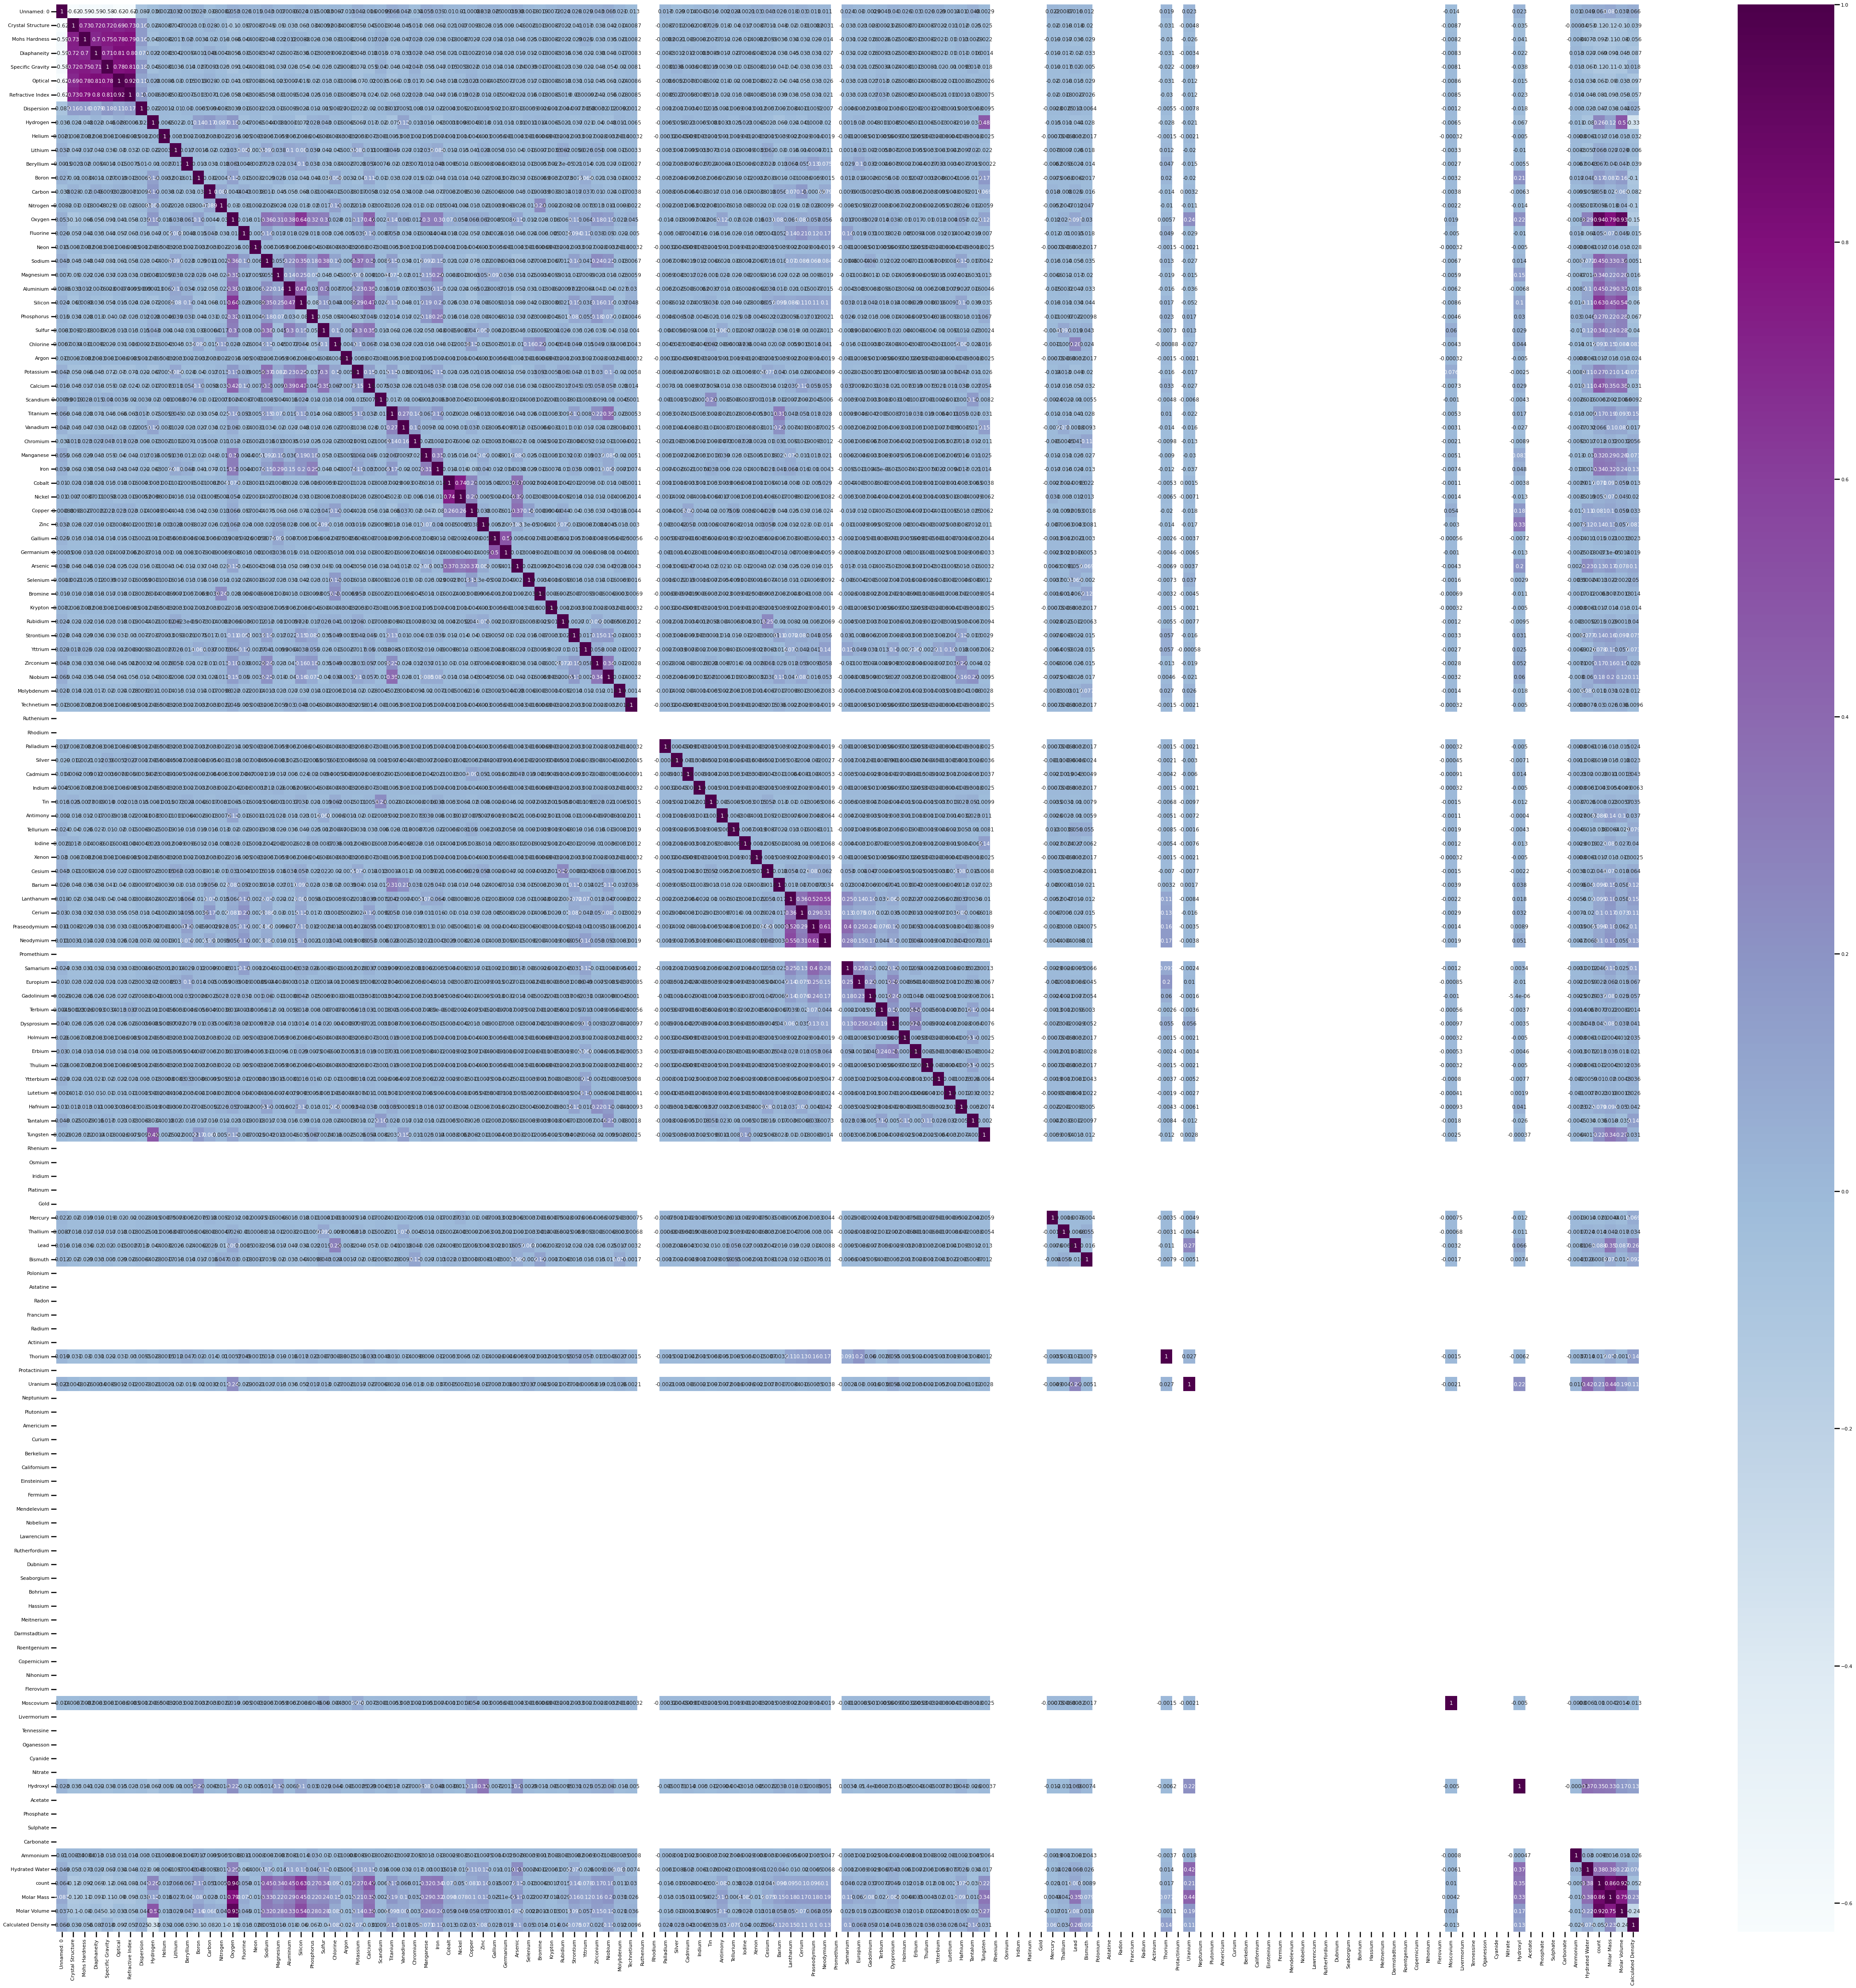

In [9]:
# Creating a heatmap graph to find the best correlation
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(80,80))
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.BuPu)
plt.show()

In [10]:
# Further identification of correlated values to Crystal Structure
target = abs(dataset.corr()["Crystal Structure"])
relevant_attributes = target [target>0.5]
relevant_attributes

Unnamed: 0           0.624126
Crystal Structure    1.000000
Mohs Hardness        0.729784
Diaphaneity          0.724877
Specific Gravity     0.722504
Optical              0.694525
Refractive Index     0.729662
Name: Crystal Structure, dtype: float64

array([2380,   84,  284,  169,   53,  116,   26])

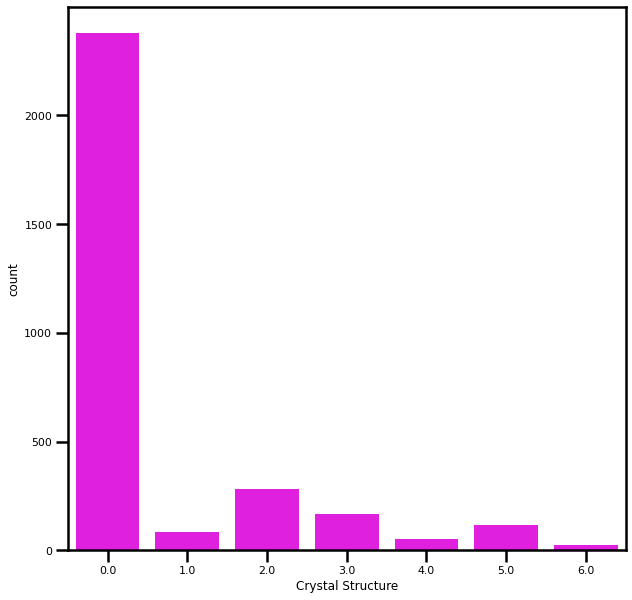

In [11]:
# Looking at the distribution of Crystal Structure
plt.figure(figsize=(10,10))
sns.countplot(data=dataset,x = 'Crystal Structure',color='magenta')
np.bincount(dataset['Crystal Structure'])

array([2507,  117,  320,  168])

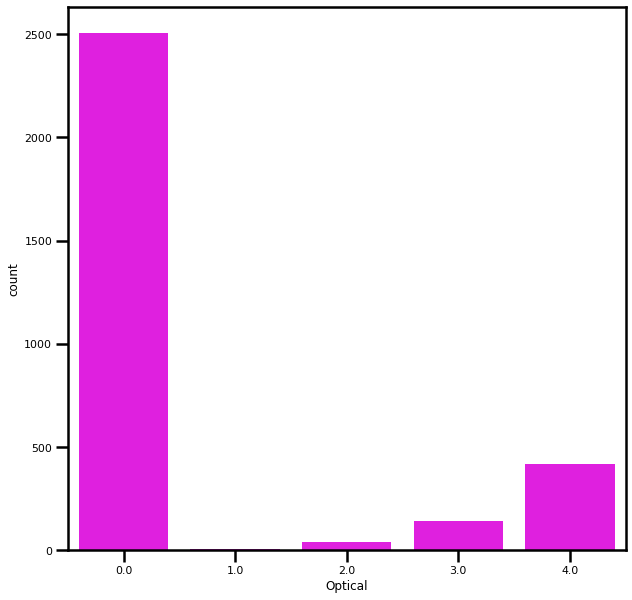

In [12]:
#Looking at the Distribution of Diaphaneity
plt.figure(figsize=(10,10))
sns.countplot(data=dataset,x = 'Optical',color='magenta')
np.bincount(dataset['Diaphaneity'])

In [13]:
# Creating an array of most likely attributes
characteristic_list = ['Crystal Structure', 'Mohs Hardness', 'Diaphaneity', 'Specific Gravity', 'Optical',
                  'Refractive Index', 'count', 'Molar Mass', 'Molar Volume', 'Calculated Density']
attribute_list = dataset[characteristic_list].iloc[0:809]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

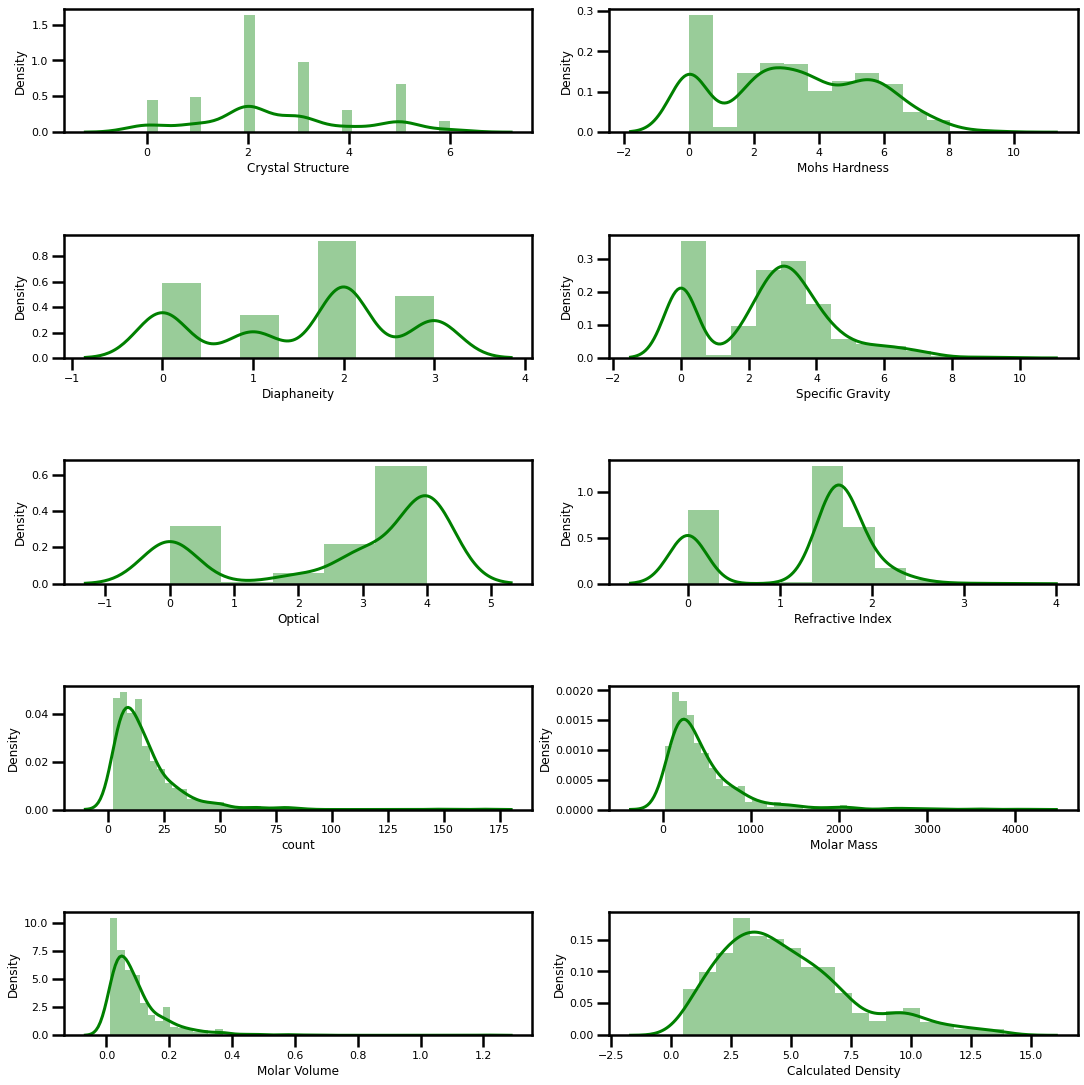

In [14]:
# Identifying the distribution of material characteristics
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(15, 15))
index = 0
axs = axs.flatten()
for k, v in attribute_list.items():
    g = sns.distplot(v, ax=axs[index], color='green')
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

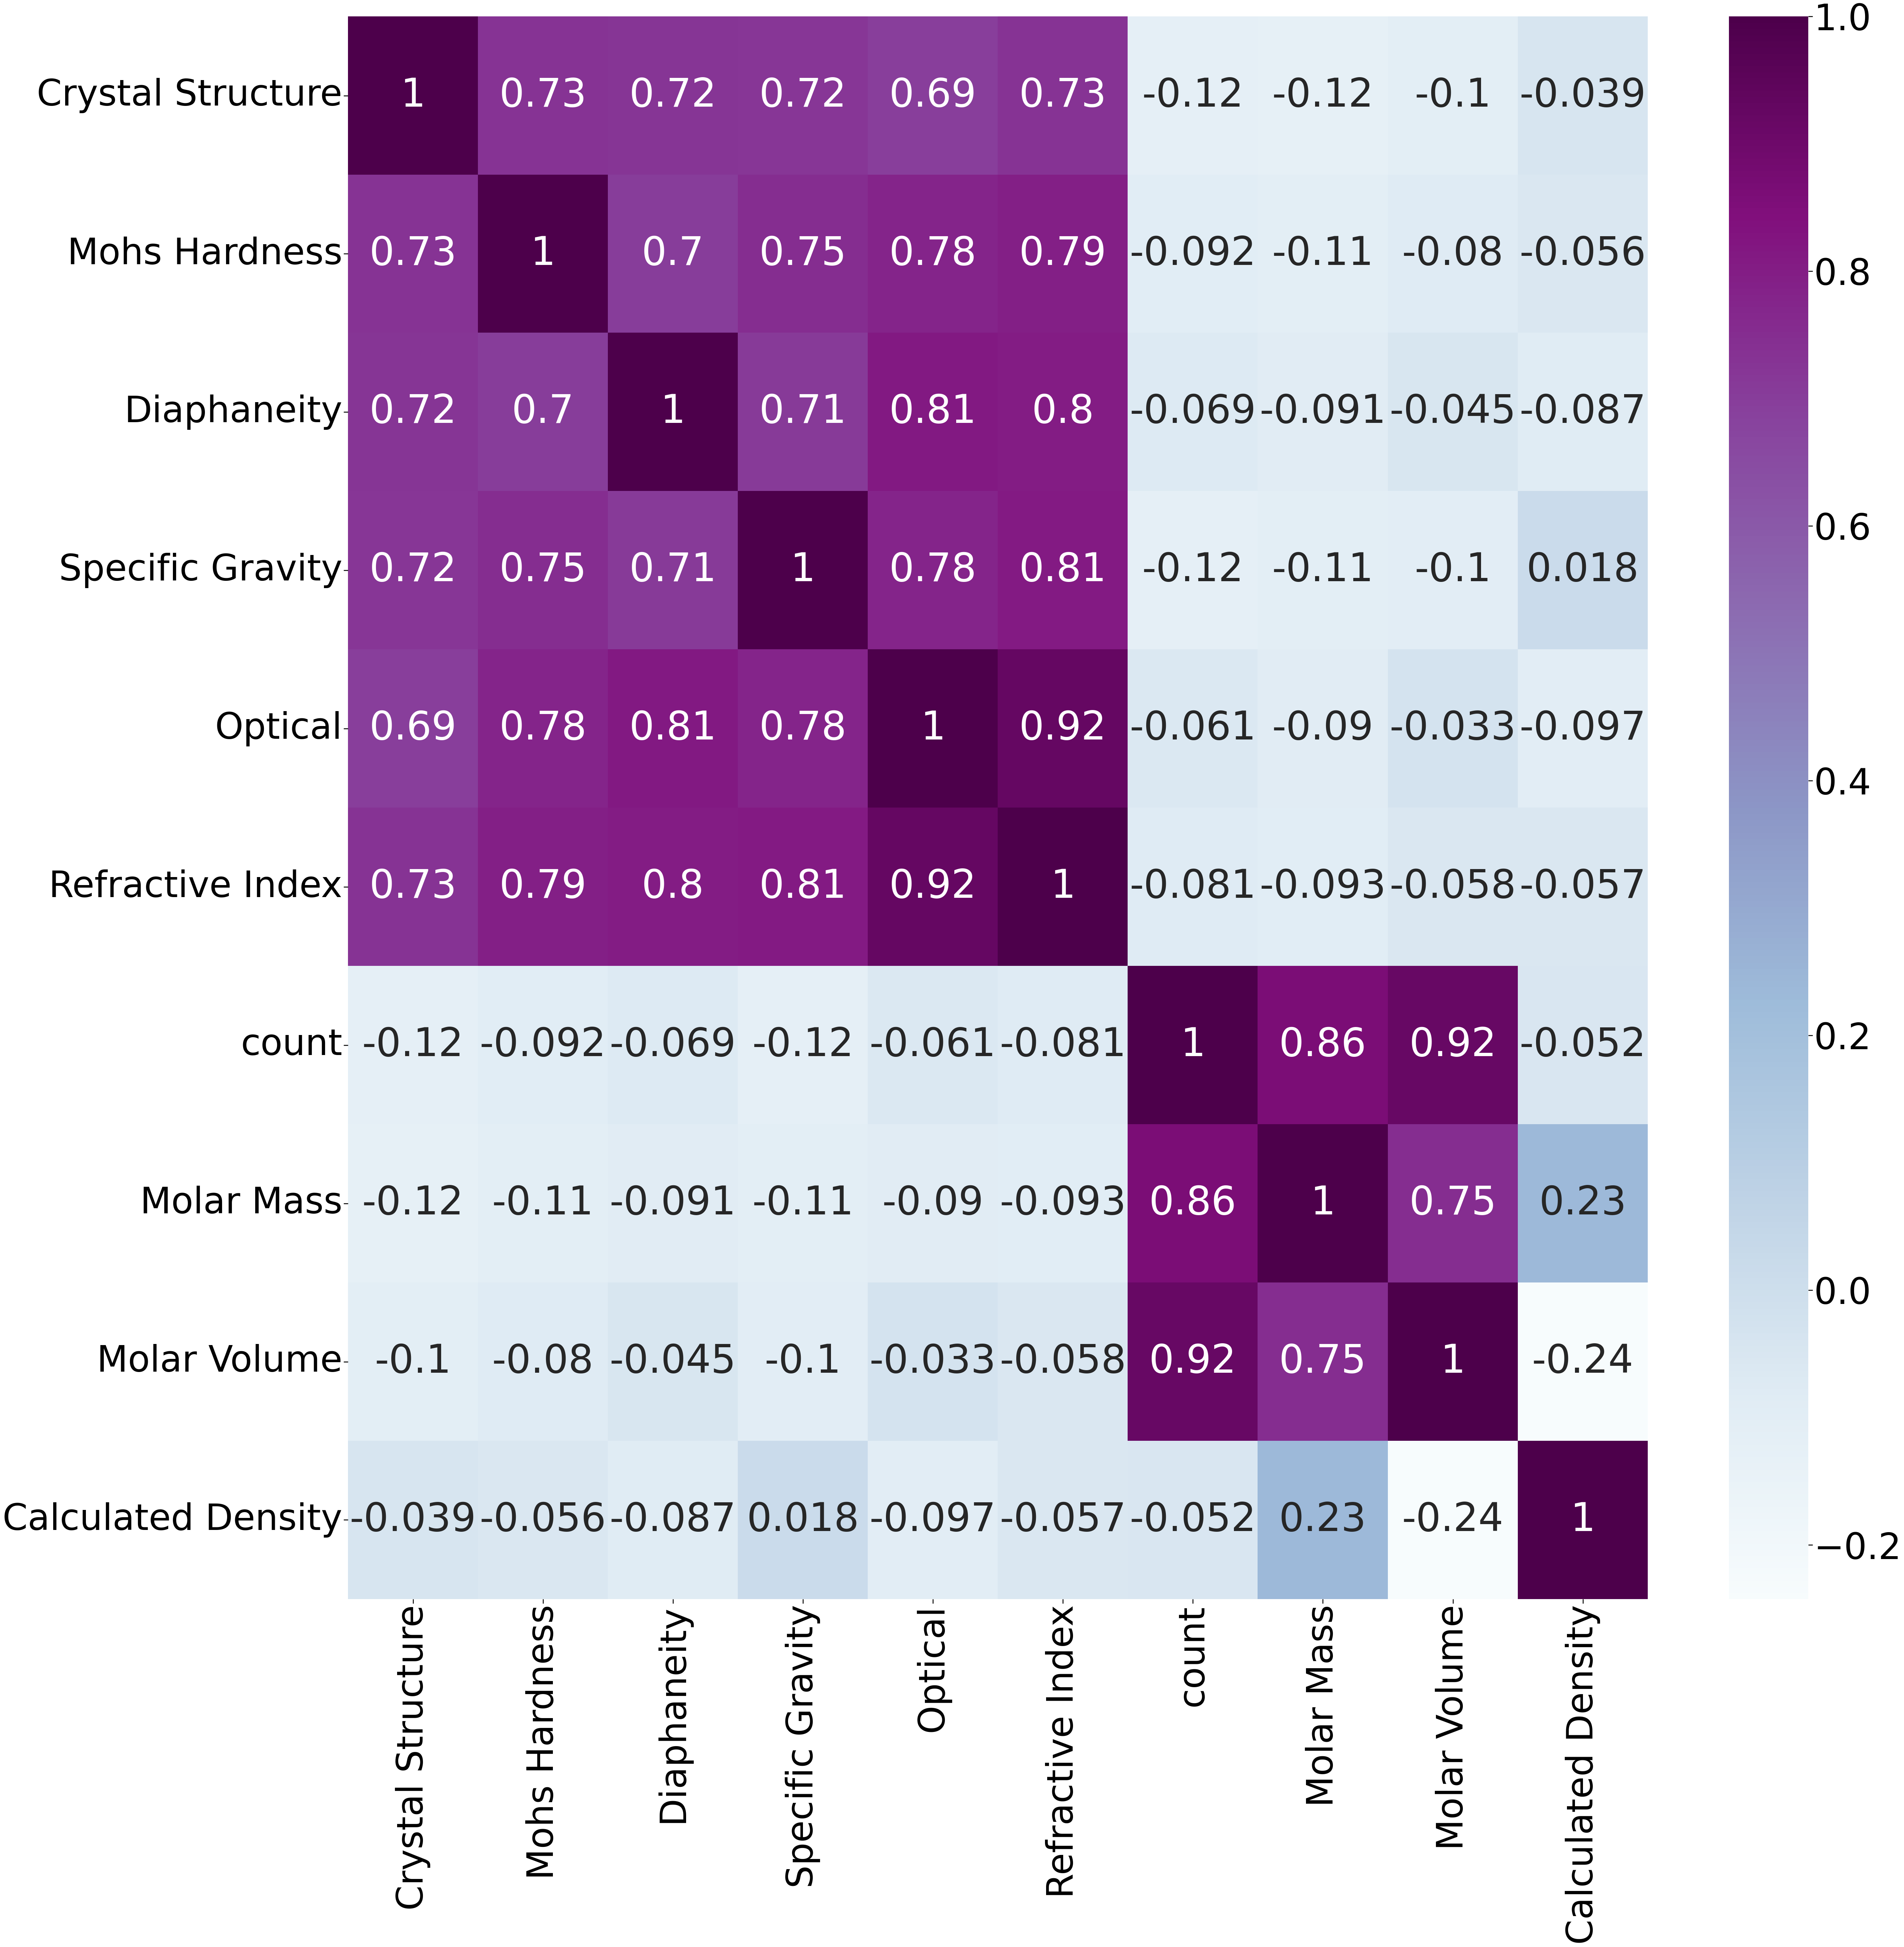

In [15]:
# Creating a heatmap graph to find correlations between columns
sns.set_context('poster', font_scale=4.5)
plt.figure(figsize=(80,80))
sns.heatmap(dataset[characteristic_list].corr(), annot=True, cmap=plt.cm.BuPu)
plt.show()

In [16]:
# Selecting the features with the greatest correlation
cor_target = abs(dataset.corr()["Crystal Structure"])
relevant_features = cor_target [cor_target>0.5]
relevant_features

Unnamed: 0           0.624126
Crystal Structure    1.000000
Mohs Hardness        0.729784
Diaphaneity          0.724877
Specific Gravity     0.722504
Optical              0.694525
Refractive Index     0.729662
Name: Crystal Structure, dtype: float64

In [17]:
# Identifying the number of mineral with values greater than 0
attribute_list = attribute_list.loc[dataset['Mohs Hardness'] > 0]
attribute_list = attribute_list.loc[dataset['Diaphaneity'] > 0]
attribute_list = attribute_list.loc[dataset['Specific Gravity'] > 0]
attribute_list = attribute_list.loc[dataset['Refractive Index'] > 0]
len(attribute_list)

451

In [18]:
# Importing Machine Learning Tools
import tensorflow as tf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [19]:
dataset.drop(dataset.index[(dataset['Crystal Structure'] == 0)],axis=0,inplace=True)
X = dataset[['Specific Gravity','Optical','Mohs Hardness','Diaphaneity','Molar Mass','Refractive Index','Calculated Density','Molar Volume','count']]
y = dataset['Crystal Structure']
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.30, random_state = 42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 9)
(220, 9)
(512, 1)
(220, 1)


In [ ]:
# Tensor Flow
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

print(dataset.columns)
ct = make_column_transformer((MinMaxScaler(), ['Diaphaneity', 'Optical', 'Mohs Hardness']), 
                             (OneHotEncoder(handle_unknown = 'ignore'), ['Molar Mass', 'Molar Volume', 'Calculated Density']))
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

Index(['Unnamed: 0', 'Name', 'Crystal Structure', 'Mohs Hardness',
       'Diaphaneity', 'Specific Gravity', 'Optical', 'Refractive Index',
       'Dispersion', 'Hydrogen',
       ...
       'Acetate', 'Phosphate', 'Sulphate', 'Carbonate', 'Ammonium',
       'Hydrated Water', 'count', 'Molar Mass', 'Molar Volume',
       'Calculated Density'],
      dtype='object', length=140)


ValueError: ignored

In [21]:
# Linear Regression
print(X_train.shape)
print(y_train.shape)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#plt.scatter(X_train, y_test, color = 'pink')
#plt.plot(X_test, y_pred, color = 'purple')
#plt.xlabel("",fontsize=1)

LinReg_accuracy = accuracy_score(y_test, y_pred)
print(LinReg_accuracy)

(512, 9)
(512, 1)


ValueError: ignored

In [22]:
# SVM Regressor
z = svm.SVC(kernel='linear')
z = z.fit(X_train, y_train)
z_pred = z.predict(X_test)
confusion_matrix(y_test, z_pred)
accuracy_svm = accuracy_score(y_test, z_pred)
print(accuracy_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4


In [21]:
y = y.reshape(-1, 1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred) 

X_grid = np.arange(min(X), max(X), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')



AttributeError: ignored

In [23]:
# Random Forest Regressor
forest = RandomForestClassifier(n_estimators = 150, criterion = "entropy")
forest = forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
confusion_matrix(y_test, forest_pred)
rf_accuracy = accuracy_score(y_test, forest_pred)
print(rf_accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.509090909090909
